<a href="https://colab.research.google.com/github/bimewok/Strava_Data_Visualization/blob/main/Animated_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mtick
import calendar
import requests, io
from IPython.display import Image
import matplotlib.image as mpimg
import matplotlib.animation as animation
from matplotlib import rc
!pip install MoviePy
rc('animation', html='jshtml')


activity_details_url = 'https://raw.githubusercontent.com/bimewok/Strava_Data_Visualization/main/data/ActivityDetails%20(2).csv'
activities = requests.get(activity_details_url).content
    
data = pd.read_csv(io.StringIO(activities.decode('utf-8')))
path_to_save = ''

In [2]:
data['Activity Date'] = pd.to_datetime(data['Activity Date'])

data = data[(data['Activity Date'] >= '2020-1-1') & (data['Activity Date'] <= '2021-1-1')].sort_values('Activity Date').reset_index()

for i in range(len(data['Total Time'])):
    data['Total Time'][i] = pd.Timedelta(data['Total Time'][i]) / np.timedelta64(1, 'h')

    
    

data['elev_running'] = data['Elevation Gain'].cumsum()
data['duration_running'] = data['Total Time'].cumsum()
data['distance_running'] = data['Distance'].cumsum()
data['day'] = data['Activity Date'].dt.dayofyear
data['month'] = data['Activity Date'].dt.month
data['month'] = data['month'].apply(lambda x: calendar.month_abbr[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


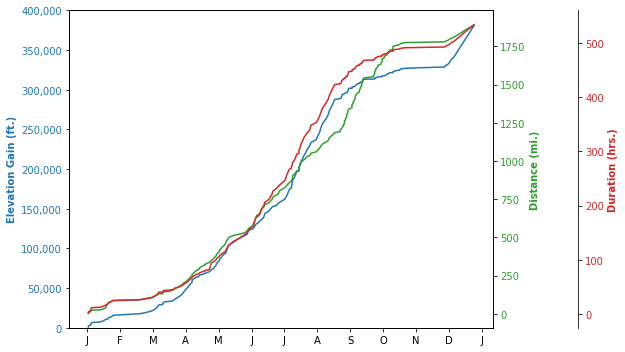

In [3]:
fig, ax1 = plt.subplots(figsize=(9, 5))

color = 'tab:blue'
#ax1.set_xlabel('date')
ax1.set_xticks(np.linspace(0.0, 365, num=13))



ax1.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J'])
ax1.set_ylabel('Elevation Gain (ft.)', color=color, fontweight='bold')
ax1.plot(data['day'], data['elev_running'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 400000)
#ax1.set_yticks([0, ])

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Distance (mi.)', color=color, fontweight='bold')  # we already handled the x-label with ax1
ax2.plot(data['day'], data['distance_running'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()

color = 'tab:red'
ax3.set_ylabel('Duration (hrs.)', color=color, fontweight='bold')  # we already handled the x-label with ax1
ax3.plot(data['day'], data['duration_running'], color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.spines["right"].set_position(("axes", 1.2))


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


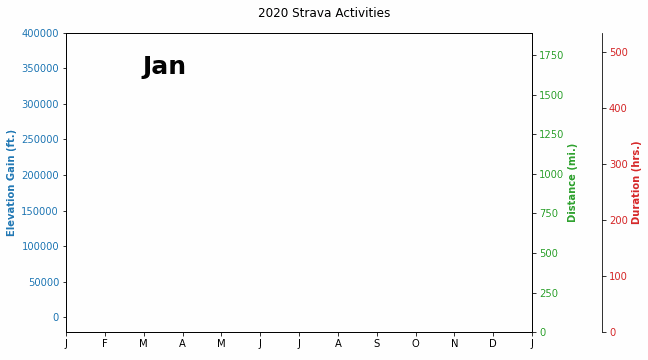

In [4]:
e_max = max(data['elev_running'])
d_max = max(data['distance_running'])
t_max = max(data['duration_running'])

data['elev_running'] = data['elev_running'] / e_max
data['distance_running'] = data['distance_running'] / d_max
data['duration_running'] = data['duration_running'] / t_max

e_lab = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]
d_lab = [0, 250, 500, 750, 1000, 1250, 1500, 1750]
t_lab = [0, 100, 200, 300, 400, 500]

from matplotlib.animation import FuncAnimation, PillowWriter  
fig, ax1 = plt.subplots(figsize=(9, 5)) 
fig.tight_layout(rect=(0.05, 0, 0.85, 0.95))

x, lin1, lin2, lin3 = [], [], [], []  
ln1, = plt.plot([], [], color='tab:blue')  
ln2, = plt.plot([], [], color='tab:green')
ln3, = plt.plot([], [], color='tab:red')
date_text = ax1.text(60., 0.9, '', fontsize=25, fontweight='bold', fontfamily='calibri')
def init():  
    fig.suptitle('2020 Strava Activities')
    ax1.set_xticks(np.linspace(0.0, 365, num=13))
    ax1.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J'])
    ax1.set_ylabel('Elevation Gain (ft.)', color='tab:blue', fontweight='bold')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_yticks([i/e_max for i in e_lab])
    ax1.set_yticklabels(e_lab)
    
    ax2 = ax1.twinx()
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax2.set_yticks([i/d_max for i in d_lab])
    ax2.set_ylabel('Distance (mi.)', color='tab:green', fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax2.set_yticklabels(d_lab)
    
    ax3 = ax1.twinx()
    ax3.set_yticks([i/t_max for i in t_lab])
    ax3.set_ylabel('Duration (hrs.)', color='tab:red', fontweight='bold')
    ax3.tick_params(axis='y', labelcolor='tab:red')
    ax3.spines["right"].set_position(("axes", 1.15))
    ax3.set_yticklabels(t_lab)

  
def update(i):  
    x.append(data['day'][i])  
    lin1.append(data['elev_running'][i])  
    lin2.append(data['distance_running'][i])  
    lin3.append(data['duration_running'][i])
    ln1.set_data(x, lin1)  
    ln2.set_data(x, lin2)  
    ln3.set_data(x, lin3)
    # ax1.text(3., 0.8, str(data['month'][i]), fontsize=9, fontweight='bold')
    date_text.set_text(data['month'][i])
    #return date_text,

ani = FuncAnimation(fig, update, len(data)-1, init_func=init)  
writer = PillowWriter(fps=10)  
ani.save('test.gif', writer=writer) 
plt.close()


#!wget test.gif
Image(open('test.gif','rb').read())


In [8]:
hiking_means = pd.DataFrame(columns=['date', 'Distance (mi.)', 'Elev Gain (ft.)', 'Speed (mph)', 'Duration (hrs.)'])
biking_means = pd.DataFrame(columns=['date', 'Distance (mi.)', 'Elev Gain (ft.)', 'Speed (mph)', 'Duration (hrs.)'])
running_means = pd.DataFrame(columns=['date', 'Distance (mi.)', 'Elev Gain (ft.)', 'Speed (mph)', 'Duration (hrs.)'])


temp = data.loc[data['Type'] == 'Hike'].reset_index()
for z in range(len(temp)):
  hiking_means = hiking_means.append({'date': temp['day'][z], 'Distance (mi.)': np.mean(temp['Distance'][:z+1]), 'Elev Gain (ft.)': np.mean(temp['Elevation Gain'][:z+1]),
                        'Speed (mph)': np.mean(temp['Avg Speed'][:z+1]), 'Duration (hrs.)': np.mean(temp['Total Time'][:z+1])}, ignore_index=True)
  
temp = data.loc[data['Type'] == 'Ride'].reset_index()
for z in range(len(temp)):
  biking_means = biking_means.append({'date': temp['day'][z], 'Distance (mi.)': np.mean(temp['Distance'][:z+1]), 'Elev Gain (ft.)': np.mean(temp['Elevation Gain'][:z+1]),
                        'Speed (mph)': np.mean(temp['Avg Speed'][:z+1]), 'Duration (hrs.)': np.mean(temp['Total Time'][:z+1])}, ignore_index=True)
  
temp = data.loc[data['Type'] == 'Run'].reset_index()
for z in range(len(temp)):
    running_means = running_means.append({'date': temp['day'][z], 'Distance (mi.)': np.mean(temp['Distance'][:z+1]), 'Elev Gain (ft.)': np.mean(temp['Elevation Gain'][:z+1]),
                        'Speed (mph)': np.mean(temp['Avg Speed'][:z+1]), 'Duration (hrs.)': np.mean(temp['Total Time'][:z+1])}, ignore_index=True)
def pad_data(data):
    days = [*range(365)]
    for i in range(len(data)):
        day = data['date'][i]
        try:
            days.remove(day)
        except:
            pass
    for i in days:
        data = data.append({'date':i}, ignore_index=True)
    data = pd.DataFrame(data.groupby('date').max())
    data = data.sort_values('date').reset_index()
    data = data.fillna(method='ffill')
    data = data.fillna(0)
    return data
hiking_means, running_means, biking_means = pad_data(hiking_means), pad_data(running_means), pad_data(biking_means)
def sort(data):
    data = data.sort_values('date')
    return data
hiking_means, running_means, biking_means =sort(hiking_means), pad_data(running_means), pad_data(biking_means)


cols = ['Distance (mi.)', 'Elev Gain (ft.)', 'Speed (mph)', 'Duration (hrs.)']



maxes = hiking_means.append(running_means)
maxes = maxes.append(biking_means)






fig, ax = plt.subplots(4,1, figsize=(10, 12), sharex=False) 
#fig.tight_layout()
fig.subplots_adjust(top=0.94, hspace=0.26)

x1, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12 = [], [], [], [], [], [], [], [], [], [], [], [], []
ln1, = ax[0].plot([], [], color='tab:blue')  
ln2, = ax[0].plot([], [], color='tab:green')
ln3, = ax[0].plot([], [], color='tab:red')

ln4, = ax[1].plot([], [], color='tab:blue')  
ln5, = ax[1].plot([], [], color='tab:green')
ln6, = ax[1].plot([], [], color='tab:red')

ln7, = ax[2].plot([], [], color='tab:blue')  
ln8, = ax[2].plot([], [], color='tab:green')
ln9, = ax[2].plot([], [], color='tab:red')

ln10, = ax[3].plot([], [], color='tab:blue')  
ln11, = ax[3].plot([], [], color='tab:green')
ln12, = ax[3].plot([], [], color='tab:red')

#date_text = ax1.text(60., 0.9, '', fontsize=25, fontweight='bold', fontfamily='calibri')
def init():  
    fig.suptitle('2020 Strava Cumulative Means\n')
    ax[0].set_xticks(np.linspace(0.0, 365, num=13))
    ax[0].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J'])
    ax[0].set_ylabel('Distance (mi.)', fontweight='bold')
    ax[0].set_title('Distance', fontweight='bold')   
    ax[0].legend([ln1, ln2, ln3], ['Hike','Run','Bike'], loc='upper right')
    ax[0].set_ylim(0, 33)
    ax[0].grid(True)
    
    ax[1].set_ylabel('Elevation Gain (ft.)', fontweight='bold')
    ax[1].set_title('Elevation Gain', fontweight='bold') 
    ax[1].set_xticks(np.linspace(0.0, 365, num=13))
    ax[1].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J'])
    ax[1].set_ylim(0,3100)
    ax[1].grid(True)
    
    ax[2].set_ylabel('Speed (mph)', fontweight='bold')
    ax[2].set_title('Speed', fontweight='bold') 
    ax[2].set_xticks(np.linspace(0.0, 365, num=13))
    ax[2].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J'])
    ax[2].set_ylim(0, 15)
    ax[2].grid(True)
    
    ax[3].set_ylabel('Duration (hrs.)', fontweight='bold')
    ax[3].set_title('Duration', fontweight='bold') 
    ax[3].set_xticks(np.linspace(0.0, 365, num=13))
    ax[3].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J'])
    ax[3].set_ylim(0, 6)
    ax[3].grid(True)
  
def update(i):  
    x1.append([*range(365)][i])
    
    d1.append(hiking_means['Distance (mi.)'][i])
    d4.append(hiking_means['Elev Gain (ft.)'][i])
    d7.append(hiking_means['Speed (mph)'][i])
    d10.append(hiking_means['Duration (hrs.)'][i])
    
    d2.append(running_means['Distance (mi.)'][i])
    d5.append(running_means['Elev Gain (ft.)'][i])
    d8.append(running_means['Speed (mph)'][i])
    d11.append(running_means['Duration (hrs.)'][i])
    
    d3.append(biking_means['Distance (mi.)'][i])
    d6.append(biking_means['Elev Gain (ft.)'][i])
    d9.append(biking_means['Speed (mph)'][i])
    d12.append(biking_means['Duration (hrs.)'][i])

    ln1.set_data(x1, d1)
    ln2.set_data(x1, d2)
    ln3.set_data(x1, d3)
    
    ln4.set_data(x1, d4)
    ln5.set_data(x1, d5)
    ln6.set_data(x1, d6)
    
    ln7.set_data(x1, d7)
    ln8.set_data(x1, d8)
    ln9.set_data(x1, d9)
    
    ln10.set_data(x1, d10)
    ln11.set_data(x1, d11)
    ln12.set_data(x1, d12)   
    


ani = FuncAnimation(fig, update, 365, init_func=init)  
print('writing')
writer = animation.FFMpegWriter(fps=20, bitrate=400)   

ani.save('cumulative_means.mp4', writer=writer)  

plt.close()
from moviepy.editor import *
clip = VideoFileClip('cumulative_means.mp4') 
clip.ipython_display(loop = 30)





100%|█████████▉| 365/366 [00:04<00:00, 89.82it/s]
